## Projeto final - Ada & RD

Neste Notebook executamos as análises do projeto final da trilha de Dados da Ada junto com a RD. Nosso grupo (G3) e é composto por:
* Anthony Zaneta Mattos de Avila
* Thaís De Souza Marins
* Luiz Gustavo Nogueira Silva
* Gabriel Voltani Vatanabe
* Jonas Henrique Arjona Gonçalves Vieira

### Introdução

Este é um projeto de análise de dados com técnicas de aprendizado de máquina proposto como trabalho final da trilha de Dados. Nele usamos uma base de dados de Marketing que contém informações sobre cliques e não-cliques em anúncios, bem como vários outras informações demográficas. O objetivo é um modelo preditivo capaz de melhorar o disparo de anúncios, apresentando anúncios exatamente para os possíveis compradores.

### Pergunta de negócio e contexto

Nossa empresa foi contratada para prestar consultoria para uma outra empresa de soluções Tech para negócios como:

* Produção de websites;
* Consultoria para produção de *softwares*;
* Consultoria para produção de conteúdo;
* Etc.

O principal objetivo da contratante é otimizar o disparo de anúncios ao aumentar a taxa de acerto dos cliques. Isto é, aumentar a conversão dos anúncios, reduzindo a quantidade de anúncios mostrados para usuários que não clicariam.

O processo atualmente não é feito usando dados, o que produz prejuízos ao gerar despesas que não são convertidas em receita.

Os dados que a empresa contratante nos oferecem advém do seu Google Analytics para uma campanha de disparo feita anteriormente. Neles temos:

* Dados demográficos dos usuários (país, cidade, sexo, idade);
* Informações do perfil de uso dos usuários (tempo de uso da internet e acesso ao site);
* Informações relacionadas ao anúncio (título, data da visualização e se foi clicado ou não).

Há um viés na base já que ele advém de uma campanha anterior de disparo. Isso significa que nossos usuários já podem ter sido considerados possíveis compradores segundo outras perspectivas que não a de dados.

Dado que a empresa vende produtos e que há na plataforma desta um impedimento para o cadastro de usuários menores que 18 anos, consideramos essa informação na hora de filtrar nossos dados.

As variáveis presentes são:

> *Variáveis quantitativas*
>
> `Daily Time Spent on Site`, tempo diário passado no site em minutos
>
> `Age`, idade em anos inteiros 
>
> `Daily Internet Usage`, uso diário de internet em minutos
>
> `Timestamp`, data e hora da visualização do anúncio
>
> *Variáveis qualitativas*
>
> `Ad Topic Line`, texto-título do anúncio 
>
> `City`, cidade do usuário
>
> `Male`, se o usuário é homem (1) ou não (0)
>
> `Country`, país do usuário
>
> `Clicked on Ad`, se o usuário clicou (1) ou não (0) no anúncio

## Parte 1 - EDA e tratamento de dados

Executamos o tratamento da base, procurando e removendo dados nulos e usuários menores de 18 anos (dada nossa regra de negócio).

Além disso, também estudamos quais variáveis são relevantes para nossa análise, seja porque são correlacionadas com nosso alvo (o clicar no anúncio), seja porque apresentam comportamentos diferentes para cada valor (como qualitativas). 

### A base

Carregamos as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pytz 

Lemos o arquivo.

In [2]:
df = pd.read_csv('../../data/advertising_full.csv')

Temos 101.450 observações. Não há nulos na base.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101450 entries, 0 to 101449
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Daily Time Spent on Site  101450 non-null  float64
 1   Age                       101450 non-null  int64  
 2   Area Income               101450 non-null  float64
 3   Daily Internet Usage      101450 non-null  float64
 4   Ad Topic Line             101450 non-null  object 
 5   City                      101450 non-null  object 
 6   Male                      101450 non-null  int64  
 7   Country                   101450 non-null  object 
 8   Timestamp                 101450 non-null  object 
 9   Clicked on Ad             101450 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 7.7+ MB


Checamos algumas entradas.

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,37.80,31,50685.11,53.05,Pre-emptive value-added workforce,Lake Beckyburgh,0,Netherlands,2016-07-17 13:22:43,1
1,68.72,53,-8613.08,118.37,Configurable disintermediate throughput,West Jessicahaven,0,Bulgaria,2016-01-09 03:45:19,1
2,58.40,10,72842.58,142.60,Pre-emptive value-added workforce,Rivasland,1,Montenegro,2016-01-23 17:39:06,1
3,65.44,60,87986.85,125.91,Configurable disintermediate throughput,Jessicashire,1,United States Minor Outlying Islands,2016-01-16 23:37:51,1
4,75.19,53,48939.62,48.86,Stand-alone empowering benchmark,Nicholasland,0,Cook Islands,2016-01-12 10:07:29,1


Em seguida, com um `.describe()` já encontramos algumas dilemas com relação à valores negativos sem sentido. Não há tempo, idade e nem renda negativa, sugerido que esses valores são algum tipo de erro que precisaremos tratar.

In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,101450.000000,101450.000000,101450.000000,101450.000000,101450.000000,101450.000000
mean,62.633954,36.467275,53802.834562,173.064760,0.498098,0.599014
std,27.045461,18.471597,28179.054243,72.853327,0.499999,0.490101
min,-61.370000,-51.000000,-64296.670000,-119.570000,0.000000,0.000000
25%,44.490000,24.000000,34927.202500,122.830000,0.000000,0.000000
50%,63.170000,37.000000,53974.840000,169.650000,0.000000,1.000000
75%,81.250000,49.000000,72858.522500,220.090000,1.000000,1.000000
max,178.440000,114.000000,177414.250000,541.270000,1.000000,1.000000


Quantas entradas possuem qualquer valor negativo?

In [6]:
valores_negativos = df[(df.select_dtypes(include=['int', 'float']) < 0).any(axis=1)].value_counts()
print(f"Quantidade de valores negativos: {valores_negativos.count()}")
print(f"Proporção negativos/total: {(valores_negativos.count()/len(df))*100:.2f}%")

Quantidade de valores negativos: 6772
Proporção negativos/total: 6.68%


Como os valores compõem uma parcela pequena das entradas, optamos por remover essas observações.

In [7]:
ind_negativos = df[(df.select_dtypes(include=['int', 'float']) < 0).any(axis=1)].index
df.drop(ind_negativos,inplace=True)

Além disso, checamos e já removemos os usuários menores de 18 anos, conforme demanda nossa regra de negócio.

In [8]:
menores = df['Age']<18
print(f"Usuários menores de idade: {menores.sum()}")
print(f"Proporção de menores sobre o total de usuários: {(menores.sum()/len(df))*100:.2f}%")

Usuários menores de idade: 12768
Proporção de menores sobre o total de usuários: 13.49%


In [9]:
df.query('Age>=18',inplace=True)

O corte de aproximadamente 20% das entradas é considerável. Mas tendo em mente que estes seriam usuários que mesmo clicando no anúncio não comprariam por inviabilidade dada a regra de negócio do site, mantê-los pode influenciar nossos resultados. Nos sobraram 81.910 entradas.

In [10]:
df.shape

(81910, 10)

### As variáveis

Primeiro, checamos a presença de *outliers* nas quantitativas para depois ir caso a caso avaliando as distribuições. Usamos duas funções para checar *outliers* auxiliares: *get_limits* obtém os limites inferior e superior dos dados; *count_outliers* conta quantos valores estão fora desses limites. Visualizamos a proporção num *DataFrame*.

In [11]:
# funcao auxiliar para obter limites
def get_limits(data_variable):
    q1=data_variable.quantile(0.25)
    q3=data_variable.quantile(0.75)
    iqr=q3-q1
    lim_sup=q3+1.5*iqr
    lim_inf=q1-1.5*iqr
    return (lim_inf,lim_sup)

# funcao auxiliar de contar outliers
def count_outliers(df_coluna):
    li,ls = get_limits(df_coluna)
    results = [((df_coluna<li) | (df_coluna>ls)).sum(), #outliers
               ((df_coluna>li) & (df_coluna<ls)).sum(), #normais
               len(df_coluna)] #total
    return results

Contando e visualizando número de *outliers*.

In [12]:
results = {}
for var_num in ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']:
    results[var_num] = count_outliers(df[var_num])

Uma fração muito pequena dos dados são *outliers*. Sabemos que eles não são menores que zero. Optamos por manter essas observações já que são valores plenamente plausíveis, apesar de incomuns.

In [13]:
pd.DataFrame(results,index=['Outlier','Normal','Total'])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Outlier,176,562,305,589
Normal,81734,81348,81605,81321
Total,81910,81910,81910,81910


#### `Daily Time Spent on Site` e `Daily Internet Usage`

Ambas essas variáveis medem algo muito parecido: tempo em minutos. As médias e medianas estão próximas, alguma simetria nos dados, mas com dispersão razoável (desvios padrões na casa dos 40% da média).

In [14]:
df[['Daily Time Spent on Site','Daily Internet Usage']].describe()

,Daily Time Spent on Site,Daily Internet Usage
count,81910.000000,81910.000000
mean,62.877799,172.459415
std,25.950020,71.130731
min,0.010000,0.020000
25%,44.600000,122.512500
50%,62.940000,168.650000
75%,80.880000,218.230000
max,178.440000,541.270000


Abaixo temos seus histogramas.

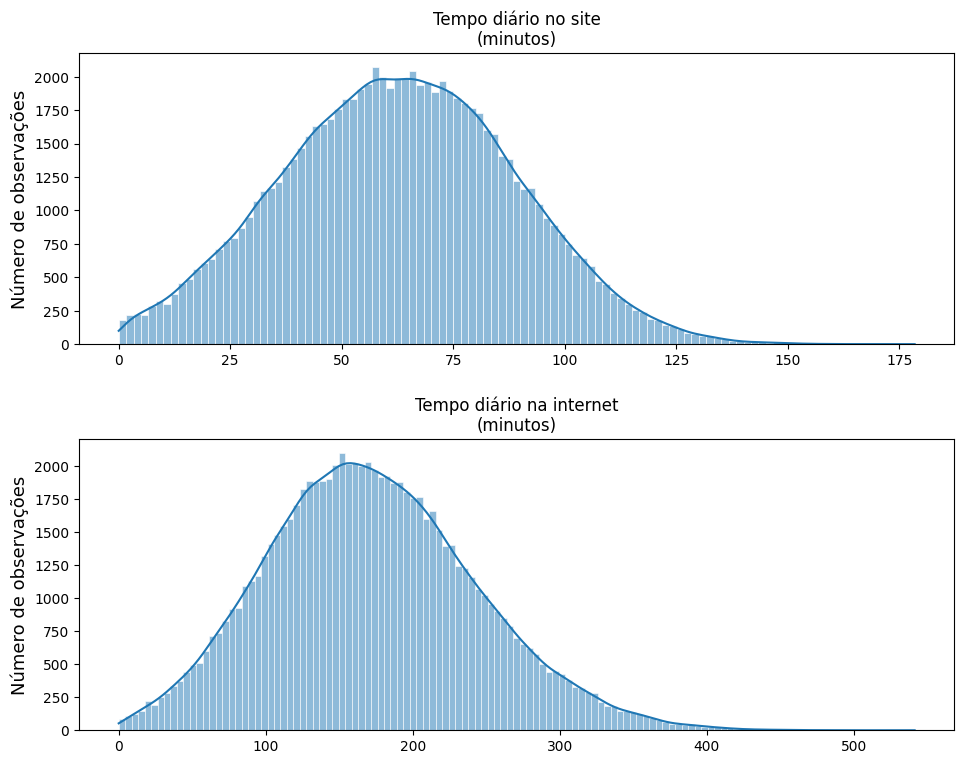

In [15]:
fig, ax = plt.subplots (2,1,figsize=(10,8))

sns.histplot(df,
             x='Daily Time Spent on Site',
             kde=True,edgecolor = 'white',ax=ax[0])

ax[0].set_title('Tempo diário no site\n(minutos)')
ax[0].set_ylabel('Número de observações',size=13)
ax[0].set_xlabel('')

sns.histplot(df,
             x='Daily Internet Usage',
             kde=True,edgecolor = 'white',
             ax=ax[1])
ax[1].set_title('Tempo diário na internet\n(minutos)')
ax[1].set_ylabel('Número de observações',size=13)
ax[1].set_xlabel('')

fig.tight_layout(pad=2)
#fig.figure.savefig('tempo_site_internet.png',dpi=600)
plt.show()

O tempo diário no site ficou, em sua maioria entre 45 e 80 minutos, enquanto que o tempo diário na internet ficou entre 100 e 250 minutos.

#### `Age`

Abaixo checamos com `.describe()` medidas-resumo da variável. Média e mediana são bem próximas e dados razovelmente dispersos (desvio padrão de 45% da média).

In [16]:
df['Age'].describe()

count    81910.000000
mean        41.563497
std         14.663733
min         18.000000
25%         30.000000
50%         40.000000
75%         51.000000
max        114.000000
Name: Age, dtype: float64

A casa dos 30 anos é a mais presente na nossa base. A distribuição dos dados definitivamente é assimétrica.

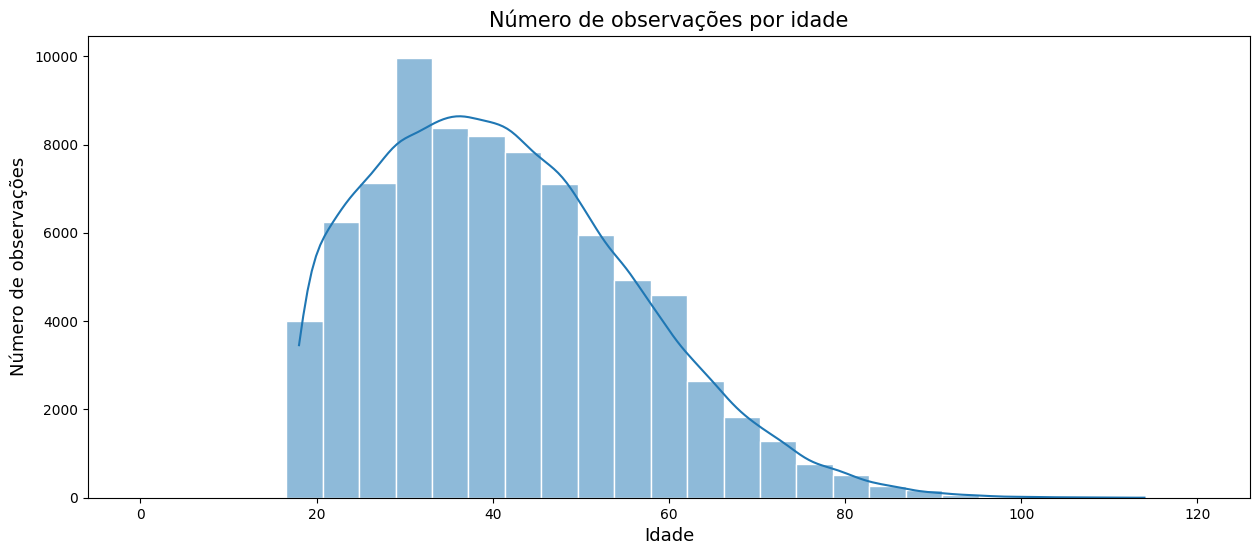

In [17]:
fig,ax=plt.subplots(figsize=(15,6))
sns.histplot(data=df,
            x='Age',bins=np.linspace(0,120,30),
            kde=True,
            edgecolor = 'white')

plt.xlabel('Idade',size=13)
plt.ylabel('Número de observações',size=13)
plt.title('Número de observações por idade',size=15)

#fig.figure.savefig('idade.png',dpi=600)
plt.show()

#### `Area Income`

No nosso `.describe()` abaixo vemos também média e medina próximas e desvio padrão próximo dos 50% do valor da média. Os casos extremos, apesar de incomuns, são plausíveis: de fato há pessoas que tem rendas absurdamente maiores ou menores do que média.

In [18]:
df['Area Income'].describe()

count     81910.000000
mean      55410.360249
std       26083.749860
min           0.300000
25%       36554.897500
50%       54681.260000
75%       73088.032500
max      177414.250000
Name: Area Income, dtype: float64

Sua distribuição segue abaixo. A maior das rendas está entre 25K e 75K de dólares.

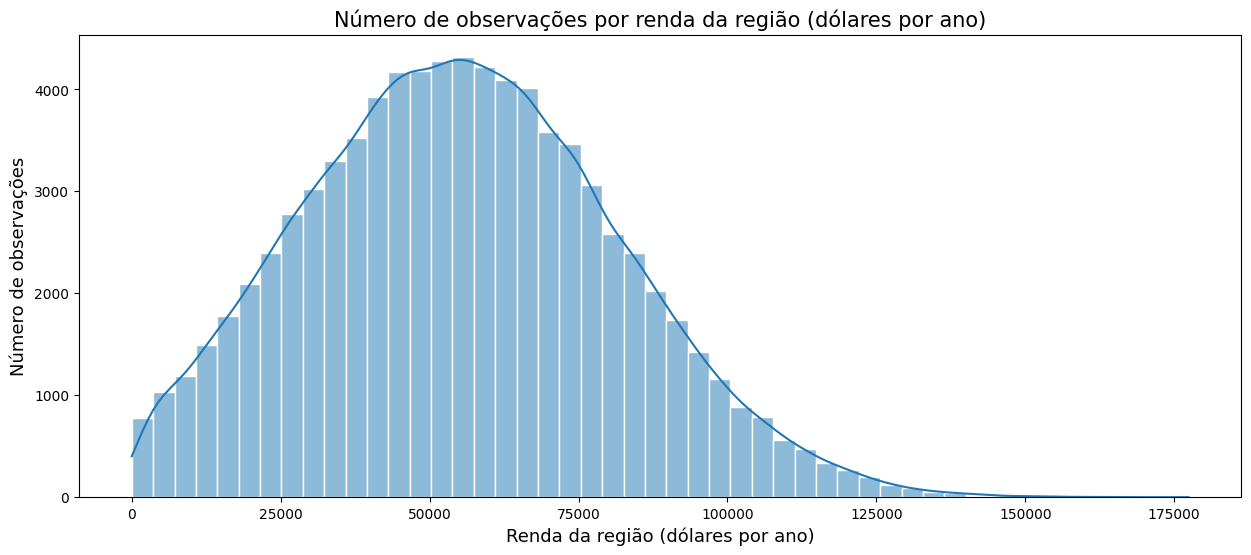

In [19]:
fig,ax=plt.subplots(figsize=(15,6))

sns.histplot(df['Area Income'],
             kde=True,
             edgecolor = 'white',
             bins = np.linspace(0,140000,40))

plt.xlabel('Renda da região (dólares por ano)',size=13)
plt.ylabel('Número de observações',size=13)
plt.title('Número de observações por renda da região (dólares por ano)',size=15)

#fig.figure.savefig('area_income.png',dpi=600)
plt.show()

#### `Timestamp`

Não usaremos essa variável na nossa análise.

#### `Ad Topic Line`, `City` e `Country`

Essas três variáveis são qualitativas discretas com muitos valores cada. Por conta disso, há certa dificuldade em plotar e extrair muitas informações delas. De qualquer forma, executamos um `.describe()` para checar as suas distribuições.

In [20]:
df.loc[:,['Ad Topic Line','City','Country']].describe()

,Ad Topic Line,City,Country
count,81910,81910,81910
unique,1000,969,237
top,Versatile content-based protocol,Williamsport,Cambodia
freq,136,206,440


Os valores são muito dispersos. Mesmo o título, país e cidade mais recorrente compõem uma parcela muito pequena dos dados.

Para extrair alguma informação dessas variáveis, executamos dois procedimentos. O primeiro deles é a introdução de uma coluna com os continentes dos países, reduzindo assim a variação de possíveis valores. Usamos um outro arquivo CSV para fazer essa associação.

In [21]:
continents = pd.read_csv('../../data/Countries-Continents.csv')
continents

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
253,North America,Martinique
254,Oceania,Heard Island and McDonald Islands
255,Africa,Saint Helena
256,Oceania,Niue


In [22]:
df = df.merge(continents,left_on='Country',right_on='Country',how='inner')

Como está a distribuição dos continentes? Europa e África são os continentes mais recorrentes.

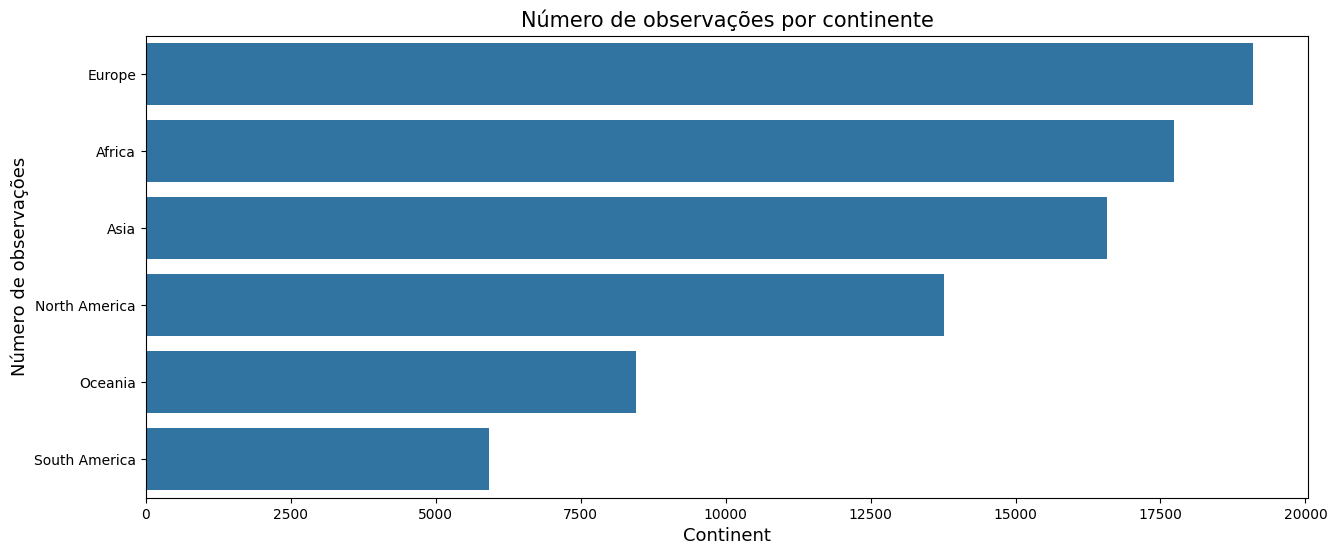

In [23]:
fig,ax=plt.subplots(figsize=(15,6))

sns.barplot(df['Continent'].value_counts(),orient='h')

plt.xlabel('Continent',size=13)
plt.ylabel('Número de observações',size=13)
plt.title('Número de observações por continente',size=15)

#fig.figure.savefig('continent.png',dpi=600)
plt.show()

O segundo procedimento foi em `Ad Topic Line`. Criamos uma nova variável com o número de caracteres do texto. Visualizamos a distribuição dos valores distinguindo por situação do clique.

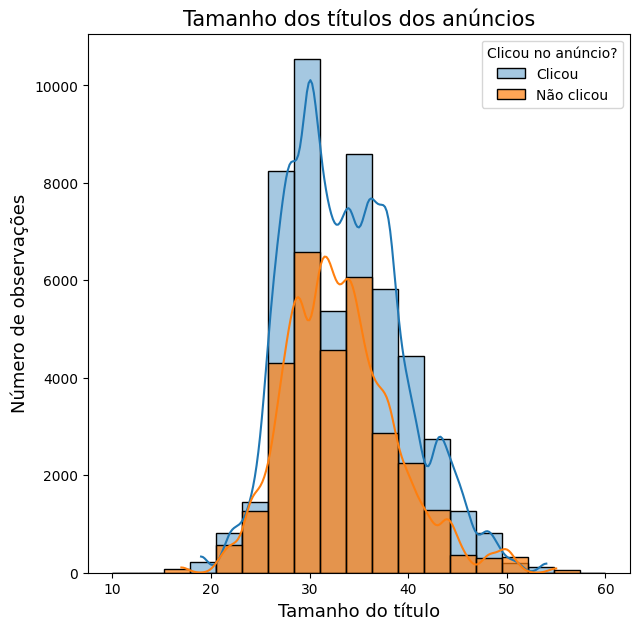

In [24]:
df['Topic_len'] = df['Ad Topic Line'].str.len()

bins = np.linspace(10,60,num=20)

fig,ax=plt.subplots(figsize=(7,7))

sns.histplot(df.query('`Clicked on Ad`==1'),
             x='Topic_len',
             label='Clicou',
             kde=True,
             bins=bins,alpha=0.4)

sns.histplot(df.query('`Clicked on Ad`==0'),
             x='Topic_len',
             label='Não clicou',
             kde=True,
             bins=bins,alpha=0.7)

plt.xlabel('Tamanho do título',size=13)
plt.ylabel('Número de observações',size=13)
plt.title('Tamanho dos títulos dos anúncios',size=15)
plt.legend(title='Clicou no anúncio?')

#fig.figure.savefig('clique_topic_len.png',dpi=600)
plt.show()

Aparentemente não há diferença entre clicar ou não clicar pelo número de caracteres do `Ad Topic Line`, apenas que a faixa entre 25 e 40 caracteres tem o maior número de anúncios.

#### `Clicked on Ad` e `Male`

As variáveis `Clicked on Ad` e `Male` serão mantidas nessa formato já que elas já se encontram do jeito que desejados lidar, _dummies_ com valores 0 ou 1. Vejamos suas distribuições.

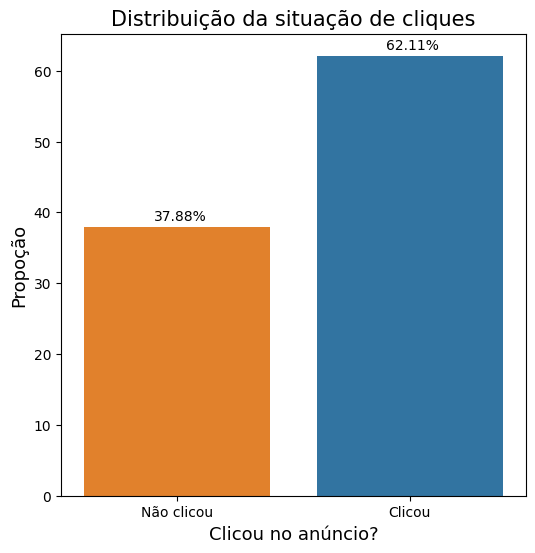

In [25]:
fig,ax = plt.subplots(figsize = (6,6))

sns.countplot(df,
              x='Clicked on Ad',
              hue='Clicked on Ad',
              palette=['#ff7f0e','#1f77b4'],stat='percent')

plt.xlabel('Clicou no anúncio?',size=13)
plt.ylabel('Propoção',size=13)
plt.xticks(ticks=[0,1],labels=['Não clicou','Clicou'])
plt.legend('').remove()

plt.annotate('37.88%',xy=(-0.1,38.88)) #clicou
plt.annotate('62.11%',xy=(0.9,63)) #n_clicou

plt.title('Distribuição da situação de cliques',size=15)

#fig.figure.savefig('clique.png',dpi=600)
plt.show()

Cerca de 60% dos usuários não clicaram no anúncio e 40% clicaram. A distribuição pelos sexos é bastante equilibrada, próximo do 50/50.

#### Situação da base e variáveis relevantes

Após as manipulações temos 81.542 observações e 12 variáveis.

In [26]:
df.shape

(81542, 12)

### Correlações

Checaremos as correlações, considerando apenas as númericas e nossas duas *dummies*.

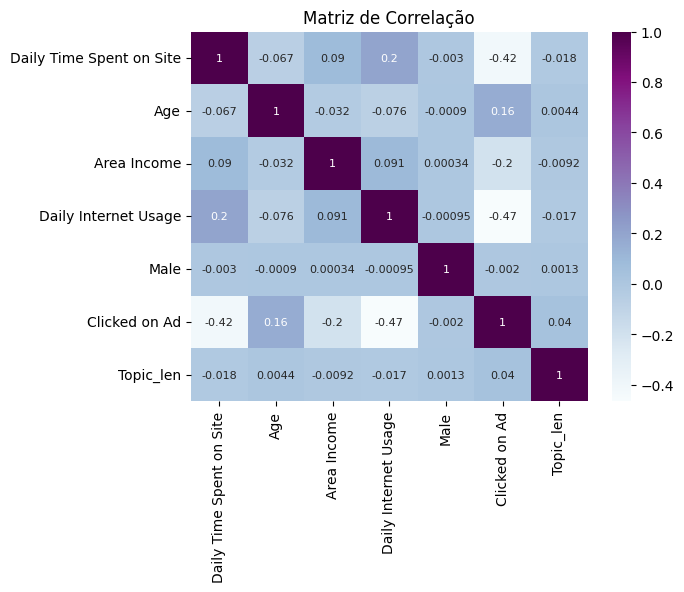

In [27]:
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='BuPu', annot_kws={"fontsize":8})
plt.title('Matriz de Correlação')
plt.show()

Apesar de correlação não implicar causalidade, destacamos os resultados encontrados. No geral não houve fortes correlações entre as variáveis.

* `Daily Internet Usage` e `Daily Time Spent on Site`: correlação positiva de **0.2**
* `Clicked on Ad` e `Age`: correlação positiva de **0.16**
* `Clicked on Ad` e `Daily Time Spent on Site`: correlação negativa de **-0.42**
* `Clicked on Ad` e `Daily Internet Usage`: correlação negativa de **-0.47**
* `Clicked on Ad` e `Area Income`: correlação negativa de **-0.2**

#### `Daily Internet Usage` e `Daily Time Spent on Site`

Ambas as variáveis de tempo estão correlacionadas positivamente (0.2), algo que faz sentido já que uma depende (em certa medida) da outra: tempo no site é também tempo navegando na internet. Trata-se de um típico caso de colinearidade.

Por conta do número de pontos, é difícil de visualizar a relação. Por isso optamos por não gerar nenhum gráfico para esta interação.

#### `Clicked on Ad` e `Age`

Esperávamos que a própria quantidade de cliques também fosse diferente para diferentes idades. Confirmamos essa suposição: o histograma dos que clicaram é mais localizado à direita e centralizado nas maiores idades (por volta dos 40 anos), enquanto que aqueles que não clicaram são majoritamente mais novos (abaixo dos 40 anos).

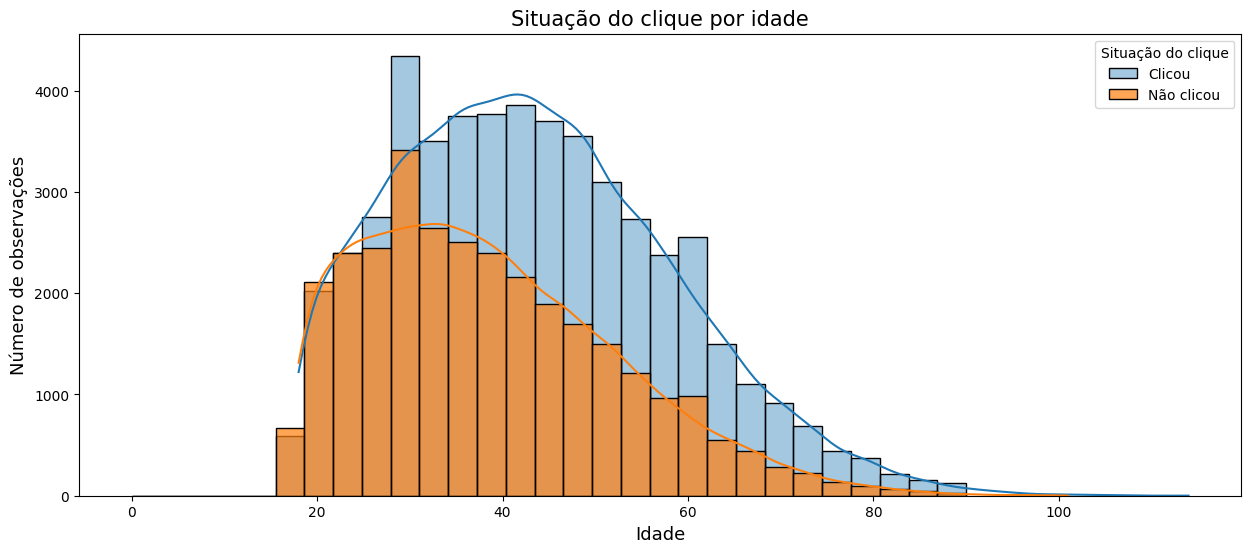

In [28]:
bins = np.linspace(0,90,num=30)

fig,ax=plt.subplots(figsize=(15,6))

sns.histplot(df.query('`Clicked on Ad`==1'),
             x='Age',
             bins=bins,kde=True,alpha=0.4,label='Clicou')

sns.histplot(df.query('`Clicked on Ad`==0'),
             x='Age',
             bins=bins,kde=True,alpha=0.7,label='Não clicou')

plt.xlabel('Idade',size=13)
plt.ylabel('Número de observações',size=13)
plt.title('Situação do clique por idade',size=15)
plt.legend(loc=1,title='Situação do clique')

#fig.figure.savefig('corr_clique_idade.png',dpi=600)
plt.show()

A fim de melhor identificar as diferenças entre os grupos, executamos um Teste T para comparar os dois grupos se descobrir se, estatisticamente falando, eles são de fato diferentes na variável numérica considerada.

Neste teste comparamos duas médias de duas populações independentes. Nossas hipóteses são:

* H0: Média de idade do "Clicou" *é igual* a Média de idade do "Não clicou"
* H1: Média de idade do "Clicou" *é diferente* da Média de idade do "Não clicou"

Rejeitamos H0 caso o p-valor do teste resulte num número menor que 5%.

In [29]:
from scipy.stats import ttest_ind

In [30]:
age_wide=pd.DataFrame({
    'clicou':df.loc[df['Clicked on Ad']==1,'Age'],
    'n_clicou':df.loc[df['Clicked on Ad']==0,'Age']
})

ttest_ind(age_wide['clicou'],age_wide['n_clicou'],nan_policy='omit')

TtestResult(statistic=46.58258490946575, pvalue=0.0, df=81540.0)

Com um p-valor menor que o limite mencionado podemos rejeitar a hipótese nula: as duas populações de fato diferem quanto às idades.

#### `Clicked on Ad` e `Daily Internet Usage`/`Daily Time Spent on Site`

Como as duas variáveis são correlacionadas entre si positivamente e com `Clicked on Ad` negativamente, esperávamos ver diferenças entre os tempos para clicou ou não. Os usuários que gastam menos tempo tanto no site quando na internet clicam mais nos anúncios.

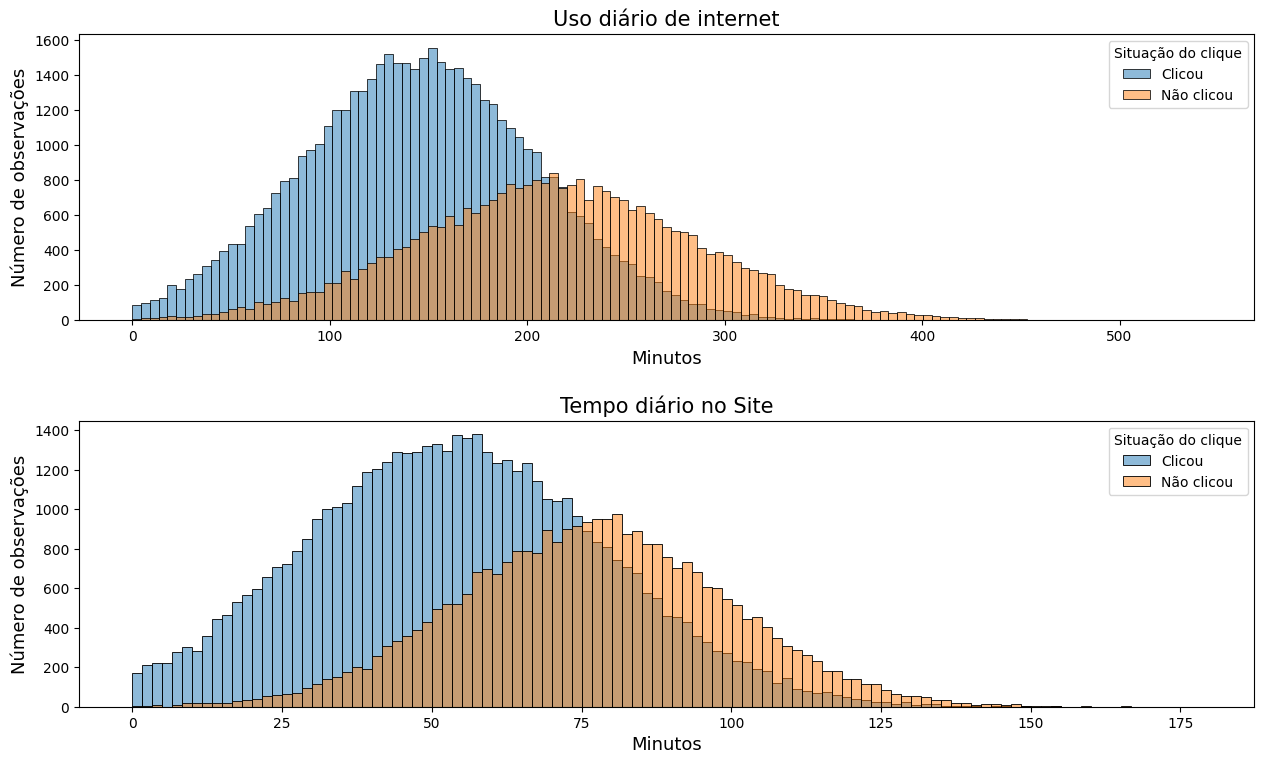

In [31]:
fig,ax = plt.subplots(2,1,figsize=(13,8))

sns.histplot(df,
             x='Daily Internet Usage',
             hue='Clicked on Ad',
             ax=ax[0],
             palette=['#ff7f0e','#1f77b4'])

sns.histplot(df,
             x='Daily Time Spent on Site',
             hue='Clicked on Ad',
             ax=ax[1],palette=['#ff7f0e','#1f77b4'])


ax[0].set_title('Uso diário de internet',size=15)
ax[0].set_ylabel('Número de observações',size=13)
ax[0].set_xlabel('Minutos',size=13)
ax[0].legend(title = 'Situação do clique',
             labels = ['Clicou','Não clicou'])

ax[1].set_title('Tempo diário no Site',size=15)
ax[1].set_ylabel('Número de observações',size=13)
ax[1].set_xlabel('Minutos',size=13)
ax[1].legend(title = 'Situação do clique',
             labels = ['Clicou','Não clicou'])

#fig.figure.savefig('clique_tempo.png',dpi=600)
fig.tight_layout(pad=2)
plt.show()

Faremos o mesmo teste de comparação das médias. Primeiro para Uso diário de internet:

* H0: Média de tempo na internet do "Clicou" *é igual* a Média de tempo na internet do "Não clicou"
* H1: Média de tempo na internet do "Clicou" *é diferente* da Média de tempo na internet do "Não clicou"

In [32]:
internet_wide=pd.DataFrame({
    'clicou':df.loc[df['Clicked on Ad']==1,'Daily Internet Usage'],
    'n_clicou':df.loc[df['Clicked on Ad']==0,'Daily Internet Usage']
})

ttest_ind(internet_wide['clicou'],internet_wide['n_clicou'],nan_policy='omit')

TtestResult(statistic=-150.11573741526982, pvalue=0.0, df=81540.0)

Rejeitamos a hipótese nula: os dois grupos apresentam médias diferentes de tempo na internet.

Segundo para tempo diário no site:

* H0: Média de tempo no site do "Clicou" *é igual* a Média de tempo no site do "Não clicou"
* H1: Média de tempo no site do "Clicou" *é diferente* da Média de tempo no site do "Não clicou"

In [33]:
site_wide=pd.DataFrame({
    'clicou':df.loc[df['Clicked on Ad']==1,'Daily Time Spent on Site'],
    'n_clicou':df.loc[df['Clicked on Ad']==0,'Daily Time Spent on Site']
})

ttest_ind(internet_wide['clicou'],internet_wide['n_clicou'],nan_policy='omit')

TtestResult(statistic=-150.11573741526982, pvalue=0.0, df=81540.0)

Rejeitamos a hipótese nula: os dois grupos apresentam médias diferentes de tempo no site.

#### `Clicked on Ad` e `Area Income`

A correlação de -0.21 é visível logo abaixo. Os cliques vieram mais de usuários de regiões com menores rendas, como fica visível na diferença entre os picos dos histogramas.

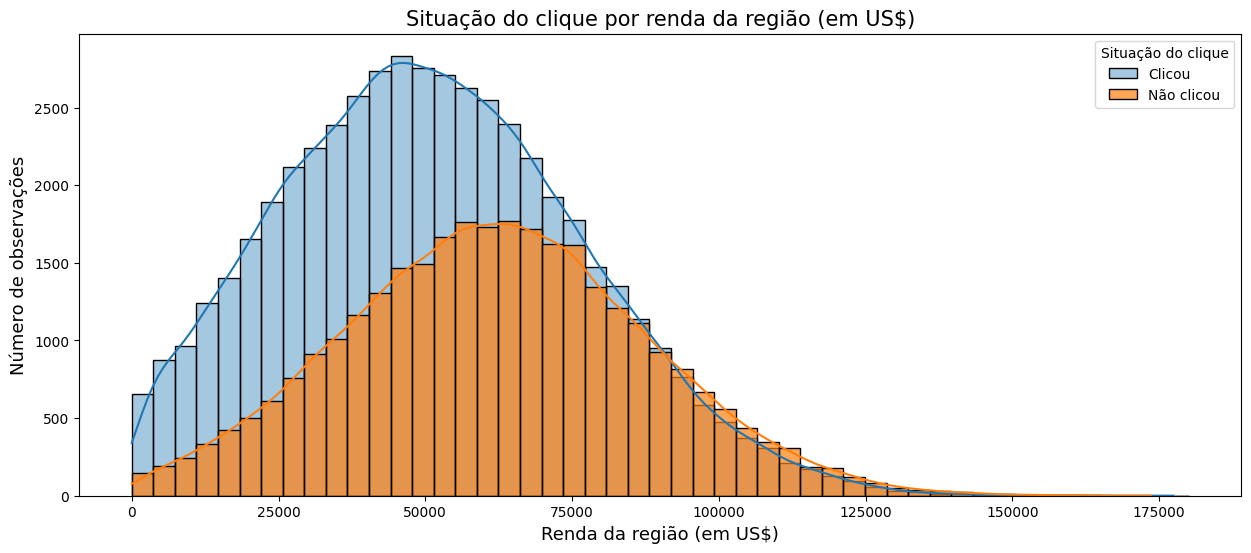

In [34]:
bins = np.linspace(0,180000,50)

fig,ax=plt.subplots(figsize=(15,6))

sns.histplot(df.query('`Clicked on Ad`==1'),
             x='Area Income',
             bins=bins,kde=True,alpha=0.4,label='Clicou',color='#1f77b4')

sns.histplot(df.query('`Clicked on Ad`==0'),
             x='Area Income',
             bins=bins,kde=True,alpha=0.7,label='Não clicou',color='#ff7f0e')

plt.xlabel('Renda da região (em US$)',size=13)
plt.ylabel('Número de observações',size=13)
plt.title('Situação do clique por renda da região (em US$)',size=15)
plt.legend(loc=1,title='Situação do clique')

#fig.figure.savefig('clique_income.png',dpi=600)
plt.show()

Executamos o mesmo teste estatístico das médias de antes. Nossas hipóteses são:

* H0: Média de renda do "Clicou" *é igual* a Média de renda do "Não clicou"
* H1: Média de renda do "Clicou" *é diferente* da Média de renda do "Não clicou"

In [35]:
income_wide=pd.DataFrame({
    'clicou':df.loc[df['Clicked on Ad']==1,'Area Income'],
    'n_clicou':df.loc[df['Clicked on Ad']==0,'Area Income']
})

ttest_ind(income_wide['clicou'],income_wide['n_clicou'],nan_policy='omit')

TtestResult(statistic=-59.02206688372795, pvalue=0.0, df=81540.0)

Novamente, rejeitamos H0: as duas populações diferem em suas rendas.

#### `Clicked on Ad` e `Continent`

Como os continentes se distribuem em situação do clique? Há mais cliques em todos os casos, com essa diferença variando pouco caso a caso.

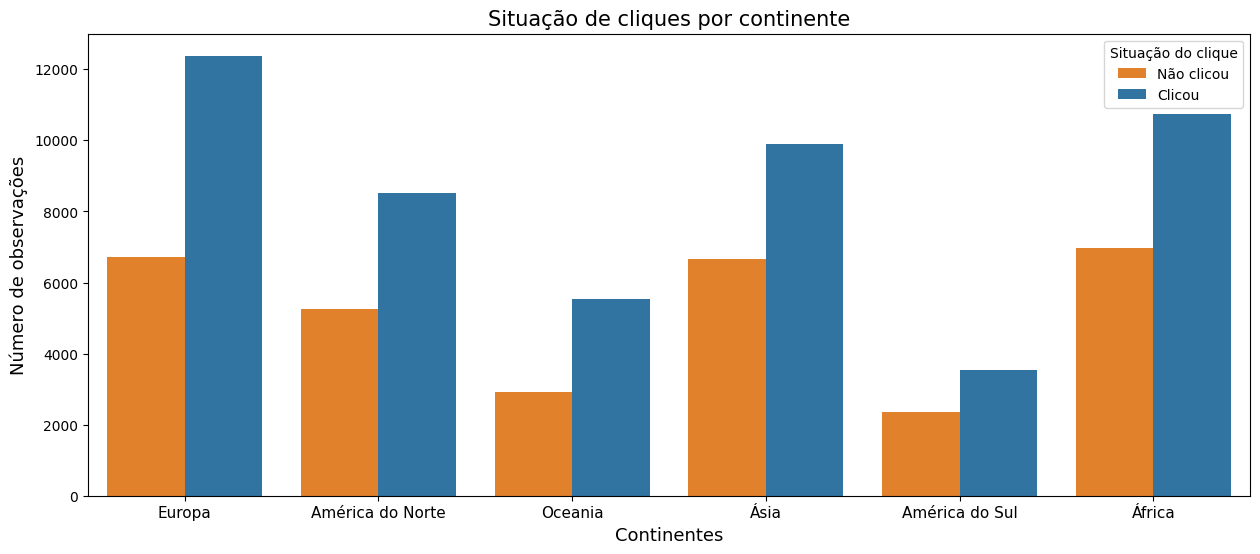

In [36]:
fig,ax=plt.subplots(figsize=(15,6))

sns.countplot(df,
              x='Continent',
              hue='Clicked on Ad',palette=['#ff7f0e','#1f77b4'])

plt.title('Situação de cliques por continente',size=15)
plt.xlabel('Continentes',size=13)
plt.xticks(ticks=df['Continent'].unique(),
           labels=['Europa','América do Norte','Oceania','Ásia','América do Sul','África'],
           size=11)
plt.ylabel('Número de observações',size=13)
plt.legend(title='Situação do clique',
           labels=['Não clicou','Clicou'])

#fig.figure.savefig('corr_clique_continent.png',dpi=600)
plt.show()

#### Fatores preditivos encontrados

Ao que vimos, as variáveis preditoras para nossa análise seriam:

* Idade: clicam mais no anúncios, além de gastarem menos tempo na internet e no site 
* Daily Time Spent on Site/Daily Internet Usage: quanto menor o tempo, maior a proporção de cliques.
* Area Income: usuário de áreas com menores rendas clicam mais.

#### Tratamento pré-modelo e montando um *Pipeline*

Para chegarmos no modelo, precisamos selecionar as features de interesse, separarmos os dados em treino e teste e fazer as devidas transformações (em Z-score ou Min-Max Scaler).

Selecionamos os features e o target.

In [37]:
X = df.drop(columns=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'])
y = df['Clicked on Ad']

Importamos as respectivas funções que usaremos agora.

In [38]:
from sklearn.model_selection import train_test_split

Executamos a separação entre treino e teste, com uma proporção de 20% teste e garantindo que tanto treino quanto teste mantenham a proporção de `Clicked on Ad`.

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42,stratify=y)

Apesar do nosso pré processamento ser bastante simples aqui, o ideal é amarrar todas as etapas de tratamento dentro de um *Pipeline* próprio do Scikit-Learn, de forma a evitar redundância no código. 

No nosso caso, tratamos as colunas numéricas num *Pipeline* a parte que conterá um imputador para dados faltantes (*SimpleImputer*) e um escalonamento (*MinMaxScaler*). As colunas categóricas passam pelo imputador e em seguida pela binarização (*OneHotEncoder*). Mesmo não tendo valores NaNs, pensamos na escalabilidade do *Pipeline*. E se algum dia ele encontrar valores NaNs?

Esses *Pipelines* então serão passados dentro de um *ColumnTransformer*, classe de objetos que gerencia quais colunas serão afetadas em quais processos. Finalmente, nas seções da Parte 2 o resultado será colocado em outro *Pipeline* junto com o modelo específico da seção.

Abaixo temos o código do *Pipeline* de pré-processamento.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [41]:
pipe_num = Pipeline([
    ('imputer_num',SimpleImputer(strategy='mean')),
    ('scaler_num',MinMaxScaler())
])

pipe_cat_male = Pipeline([
    ('imputer_cat_male',SimpleImputer(strategy='most_frequent'))
])

pipe_cat_cont = Pipeline([
    ('imputer_cat_cont',SimpleImputer(strategy='most_frequent')),
    ('one_hot',OneHotEncoder())
])

colunas_num = ['Daily Time Spent on Site','Area Income','Daily Internet Usage','Age','Topic_len']

preprocessing = ColumnTransformer([
    ('transf_num',pipe_num,colunas_num),
    ('transf_cat_male',pipe_cat_male,['Male']),
    ('transf_cat_cont',pipe_cat_cont,['Continent'])],
    verbose_feature_names_out=False)

O escalonamento foi feito usando o `MinMaxScaler()`, que muda a escala dos dados pra entre 0 e 1, considerando os valores mínimo e máximo originais. A binarização de `Continent` criou uma coluna a mais para cada possível valor dessa variável, com valores sendo 0 ou 1. Abaixo vemos o formato dos dados após a aplicação do pré-processamento.

In [42]:
pd.DataFrame(preprocessing.fit_transform(X_train),
             columns=preprocessing.get_feature_names_out())

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Age,Topic_len,Male,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,0.373155,0.215466,0.379077,0.427083,0.631579,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.620952,0.370470,0.474511,0.135417,0.184211,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.286548,0.206545,0.314481,0.427083,0.421053,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.506548,0.366069,0.239186,0.166667,0.605263,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.403452,0.276177,0.395577,0.041667,0.763158,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65228,0.453095,0.289252,0.370984,0.541667,0.342105,0.0,0.0,0.0,1.0,0.0,0.0,0.0
65229,0.683750,0.136129,0.306609,0.135417,0.605263,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65230,0.314048,0.096326,0.255150,0.416667,0.710526,0.0,1.0,0.0,0.0,0.0,0.0,0.0
65231,0.442738,0.121647,0.394449,0.218750,0.289474,1.0,0.0,0.0,0.0,0.0,0.0,1.0


A partir daqui nossos dados já estão no melhor formato para nossas análises.

## Parte 2 - Aplicação do modelo escolhido

Partindo a pergunta de negócio, gostaríamos de otimizar a taxa de acerto dos anúncios, gerando um algoritmo que apresente uma boa *Precision*. Objetivamos reduzir disparos que não geram cliques.

Ao executar testes com alguns modelos e manipular seus hiperparâmetros, chegamos à conclusão de que Árvore de Decisão é o que apresenta a melhor *Precision*, mesmo apresentando outras métricas não tão boas.

### Árvore de decisão

Árvore de decisão é um algoritmo de machine learning muito utilizado, devido a sua versatilidade e estrutura de fácil visualização. Segue a premissa de decisões, partindo de um nó raiz, chegando até um nó folha, por meio dos ramos, que são as diferentes respostas.

Esta abordagem baseada em árvore permite representar e interpretar decisões complexas de uma forma compreensível, assemelhando-se a um fluxograma.

Além disso, as Árvores de Decisão, devido sua versatilidade, funcionam com diferentes tipos de dados e podem ser utilizadas tanto para problemas de classificação quanto de regressão. 

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate,StratifiedKFold

Usamos StratifiedKFold para gerar dobras que serão usadas no treino do modelo representativas da proporção do *Target*.

In [44]:
skfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

Criamos nosso *Pipeline* com a Árvore de Decisão dentro. Selecionamos uma profundidade máxima da árvore já que não especificando a complexidade da árvore fica muito grande e o algoritmo "aprende demais" com os dados.

In [45]:
pipe_final = Pipeline([
    ('preprocess',preprocessing),
    ('tree',DecisionTreeClassifier(max_depth=7,random_state=42))
])

Finalmente aplicamos um *cross_validate* com várias métricas.

In [46]:
metricas = ['f1','accuracy','precision','recall','roc_auc']

results = cross_validate(pipe_final,
                         X_train,y_train,
                         cv=skfolds,
                         scoring=metricas,
                         return_train_score=True,
                         return_estimator=True)

Abaixo temos os resultados das métricas em questão.

In [47]:
print('F1 de treino:', results['train_f1'].mean())
print('F1 de validacao:', results['test_f1'].mean())

print('\nAccuracy de treino:', results['train_accuracy'].mean())
print('Accuracy de validacao:', results['test_accuracy'].mean())

print('\nPrecision de treino:', results['train_precision'].mean())
print('Precision de validacao:', results['test_precision'].mean())

print('\nRecall de treino:', results['train_recall'].mean())
print('Recall de validacao:', results['test_recall'].mean())

print('\nRoc_auc de treino:', results['train_roc_auc'].mean())
print('Roc_auc de validacao:', results['test_roc_auc'].mean())

F1 de treino: 0.8361498333762389
F1 de validacao: 0.8266399060188835

Accuracy de treino: 0.7904319938027344
Accuracy de validacao: 0.7783484187717372

Precision de treino: 0.8128231130126877
Precision de validacao: 0.8038501157429684

Recall de treino: 0.8608896841066139
Recall de validacao: 0.8507897334649556

Roc_auc de treino: 0.8587344347267081
Roc_auc de validacao: 0.8459461275528524


Como ficou visualmente a árvore?

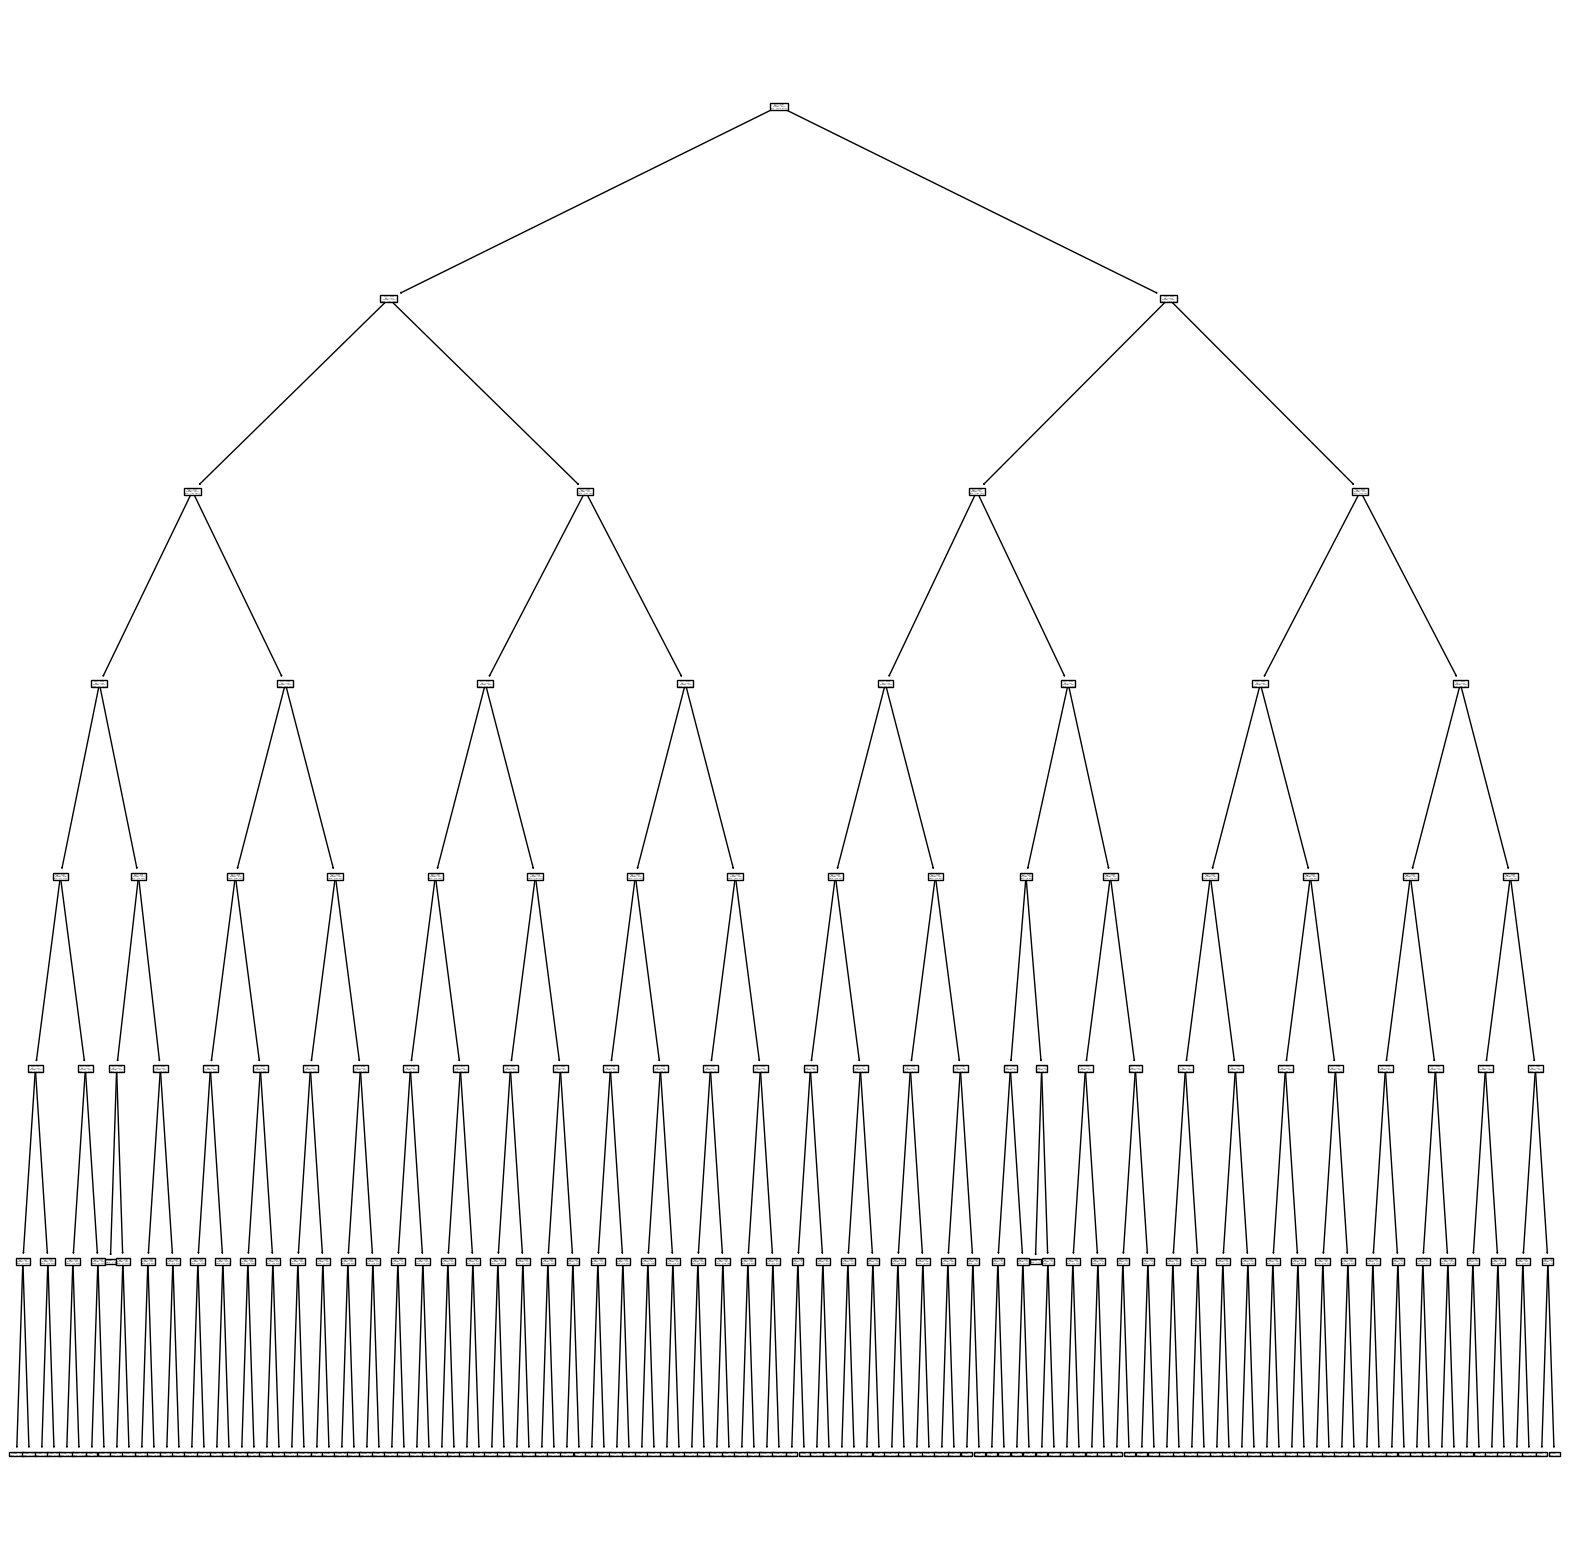

In [48]:
fig, ax = plt.subplots(figsize=(20,20))
plot_tree(results['estimator'][1][1])
plt.show()

Podemos agora começar a lidar com a otimização dos hiperparâmetros. Modificamos o critério e a métrica de divisão, a profundidade máxima e os números mínimos de entradas por folha e por separação. Usando RandomizedSearchCV para selecionar aleatoriamente valores entre os especificados.

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
param_distributions = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__splitter': ['best', 'random'],
    'tree__max_depth': list(range(2, 11)),
    'tree__min_samples_split': list(range(2, 11)),
    'tree__min_samples_leaf': list(range(1, 11)),
}

Indicamos que o melhor modelo será escolhido com base no melhor *Precision*.

In [51]:
rand_search = RandomizedSearchCV(pipe_final,
                                 param_distributions,
                                 n_iter=30,
                                 cv=skfolds,
                                 scoring='precision',return_train_score=True,
                                 random_state=42)

In [52]:
rand_search.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('transf_num',
                                                                               Pipeline(steps=[('imputer_num',
                                                                                                SimpleImputer()),
                                                                                               ('scaler_num',
                                                                                                MinMaxScaler())]),
                                                                               ['Daily '
                                                                                'Time '
                                                                                'Spent '
                                                                                'on '
                                                                                'Site',
                                                                                'Area '
                                                                                'Income',
                                                                                'Daily '
                                                                                'Internet '
                                                                                'Usage',
                                                                                'Age',
                                                                                'Topic_len']),
                                                                              ('transf_cat_...
                                              DecisionTreeClassifier(max_depth=7,
                                                                     random_state=42))]),
                   n_iter=30,
                   param_distributions={'tree__criterion': ['gini', 'entropy'],
                                        'tree__max_depth': [2, 3, 4, 5, 6, 7, 8,
                                                            9, 10],
                                        'tree__min_samples_leaf': [1, 2, 3, 4,
                                                                   5, 6, 7, 8,
                                                                   9, 10],
                                        'tree__min_samples_split': [2, 3, 4, 5,
                                                                    6, 7, 8, 9,
                                                                    10],
                                        'tree__splitter': ['best', 'random']},
                   random_state=42, return_train_score=True,
                   scoring='precision')

Podemos checar qual o melhor conjunto de hiperparâmetros e qual o melhor *score* obtido. Não parece que obtemos lá grande diferença.

In [53]:
print('melhores parametros:',rand_search.best_params_)
print('melhor score de precision:',rand_search.best_score_)

melhores parametros: {'tree__splitter': 'random', 'tree__min_samples_split': 7, 'tree__min_samples_leaf': 9, 'tree__max_depth': 4, 'tree__criterion': 'entropy'}
melhor score de precision: 0.8200127044260382


Checando individualmente os *scores* dos *solvers* e penalidades, vemos que eles são muito próximos um do outro, apesar da amplitude entre os valores de validação ser relevante (cerca de 9,5%)

In [54]:
print('precision dos treinos: ',sorted(rand_search.cv_results_['mean_train_score']))
print('precision das validações: ',sorted(rand_search.cv_results_['mean_test_score']))

precision dos treinos:  [0.7387972450116218, 0.7396494889838303, 0.7764700074649268, 0.7811246509955725, 0.7821938490414955, 0.7831248835511047, 0.7831248835511047, 0.7838840007349618, 0.79049745715855, 0.7942643688755981, 0.7946144540184774, 0.795347129432769, 0.7953706051926972, 0.7963238391957069, 0.7965029318553827, 0.7997027034988611, 0.8023055600492001, 0.8063770825202055, 0.8081081243768462, 0.8081081243768462, 0.8099565142792027, 0.8102713694200865, 0.8106921756130155, 0.8108540012425678, 0.8189339136655498, 0.8200084017305193, 0.8200084017305193, 0.8229165017355937, 0.8238139038336518, 0.8287872918469871]
precision das validações:  [0.7379689457861737, 0.7387582756304736, 0.7767541353889829, 0.7794246468845928, 0.7794246468845928, 0.7814126792889551, 0.7814836911123374, 0.7833577910418744, 0.7901784009597727, 0.7906149604245143, 0.7916746995453655, 0.7917058422120908, 0.7920856755313047, 0.7923465320483668, 0.7956306549438124, 0.7962676277283978, 0.797344903241799, 0.797601721

Finalmente temos a matriz de confusão para nossos dados de treino.

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

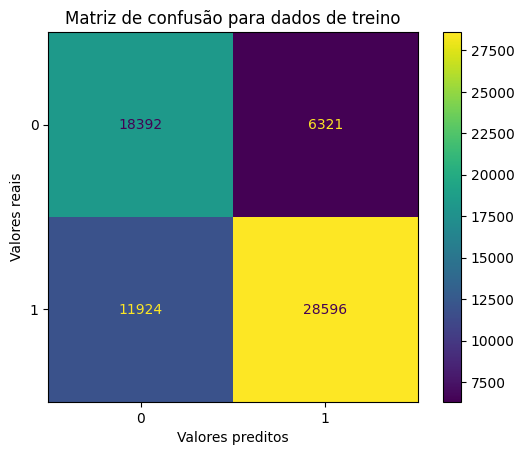

In [56]:
y_train_pred = rand_search.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.title('Matriz de confusão para dados de treino')
plt.xlabel('Valores preditos')
plt.ylabel('Valores reais')
plt.show()

In [57]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,roc_auc_score

In [58]:
print('f1 de treino: ',f1_score(y_train,y_train_pred))
print('accuracy de treino: ',accuracy_score(y_train,y_train_pred))
print('precision de treino: ',precision_score(y_train,y_train_pred))
print('recall de treino: ',recall_score(y_train,y_train_pred))
print('roc_auc de treino: ',roc_auc_score(y_train,y_train_pred))

f1 de treino:  0.7581425560401395
accuracy de treino:  0.7203102724081369
precision de treino:  0.8189707019503394
recall de treino:  0.705725567620928
roc_auc de treino:  0.7249746277792255


Geramos a matriz de confusão e obtemos as métricas do modelo nos dados de teste.

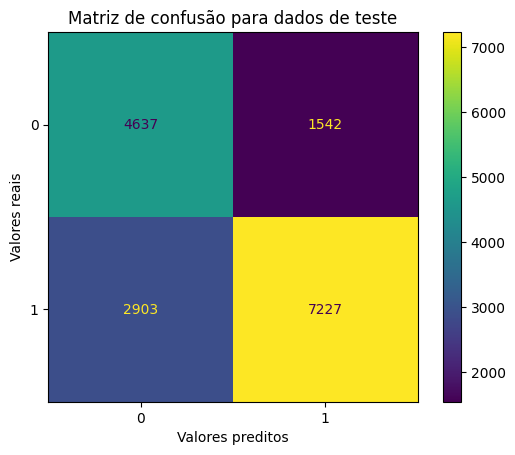

In [59]:
y_test_pred = rand_search.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.title('Matriz de confusão para dados de teste')
plt.xlabel('Valores preditos')
plt.ylabel('Valores reais')
plt.show()

Nosso modelo manteve um valor muito próximo do *Precision* de treino, apesar de levemente diferente. Suspeitas de *overfitting* ou *underfitting* não aparecem aqui, já que tanto para teste quanto para treino não tivemos métricas muito grandes (que indicaria *overfitting*) e nem muito pequenas (indicando *underfitting*). O recall geral do modelo é sua pior métrica: 71,34%. 

In [60]:
print('f1 de teste: ',f1_score(y_test,y_test_pred))
print('accuracy de teste: ',accuracy_score(y_test,y_test_pred))
print('precision de teste: ',precision_score(y_test,y_test_pred))
print('recall de teste: ',recall_score(y_test,y_test_pred))
print('roc_auc de teste: ',roc_auc_score(y_test,y_test_pred))

f1 de teste:  0.7648023704957935
accuracy de teste:  0.72745110061929
precision de teste:  0.8241532671912418
recall de teste:  0.7134254689042449
roc_auc de teste:  0.7319352623692611


### Comparando o modelo final com a performance original da empresa

Como dito anteriormente, a base usada advém de uma tentativa anterior de disparo de anúncios que não usava uma estratégia em dados. Logo, todos os casos foram considerados como possíveis cliques mas apenas 62% deles clicaram. Com as sugestões do nosso modelo usando uma Árvore de Decisão, cerca de 86% dos usuários que indicamos o anúncio clicaram nele, um aumento percentual da taxa de acerto de 38%.

In [62]:
data = [['Clicou',50650,62.11,7227,82.41],
        ['Não Clicou',30892,37.88,1542,17.59],
        ['Total',81542,100,8769,100]]

resumo = pd.DataFrame(data,columns=['Situação','Disparo original','Disparo original (%)',
                      'Indicação do modelo','Indicação do modelo (%)'])

resumo = resumo.melt(id_vars='Situação',value_vars=['Disparo original','Disparo original (%)',
                      'Indicação do modelo','Indicação do modelo (%)'])
resumo

,Situação,variable,value
0,Clicou,Disparo original,50650.00
1,Não Clicou,Disparo original,30892.00
2,Total,Disparo original,81542.00
3,Clicou,Disparo original (%),62.11
4,Não Clicou,Disparo original (%),37.88
5,Total,Disparo original (%),100.00
6,Clicou,Indicação do modelo,7227.00
7,Não Clicou,Indicação do modelo,1542.00
8,Total,Indicação do modelo,8769.00
9,Clicou,Indicação do modelo (%),82.41


In [63]:
resumo_perc = resumo.query('Situação!="Total" & variable.isin(["Disparo original (%)","Indicação do modelo (%)"])')

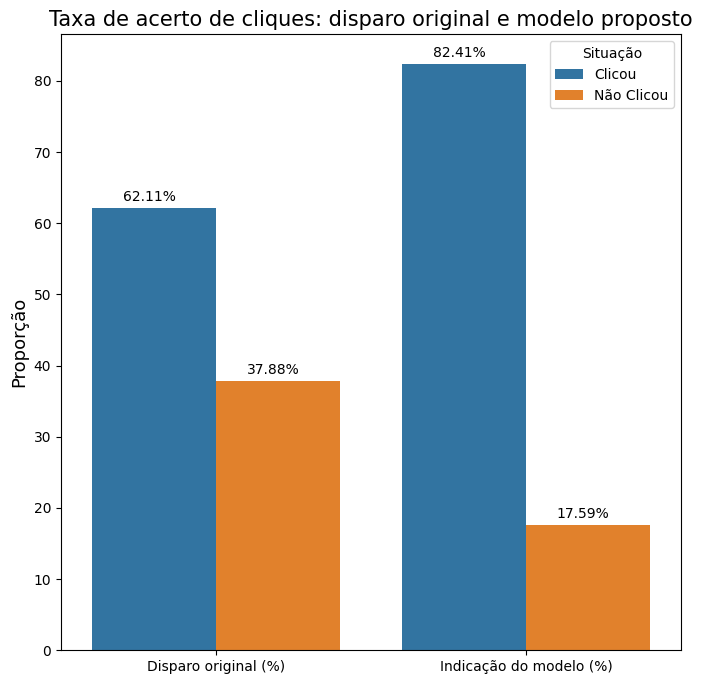

In [65]:
fig,ax = plt.subplots(figsize=(8,8))

sns.barplot(resumo_perc,
            x='variable',
            hue='Situação',
            y='value')

plt.annotate('62.11%',xy=(-0.30,63.11)) #clicou
plt.annotate('37.88%',xy=(0.10,38.88)) #n_clicou
plt.annotate('82.41%',xy=(0.70,83.41)) #clicou
plt.annotate('17.59%',xy=(1.10,18.59)) #n_clicou

plt.xlabel('')
plt.ylabel('Proporção',size=13)
plt.title('Taxa de acerto de cliques: disparo original e modelo proposto',size=15)

#fig.figure.savefig('result_modelo.png',dpi=600)
plt.show()

## Conclusões

Como vimos, um disparo massivo de anúncios é um investimento alto numa estratégia de CRM que precisa ser amparado por conhecimendos do perfil do público que visamos alcançar. Não levar isso em conta na hora de disparar conteúdo resulta exatamente no que vemos aqui: uma taxa muito reduzida de cliques e muita despesa desnecessária.

Nosso modelo proposto, uma Árvore de Decisão, é relativamente simples e leve, sendo cpaz de alcançar facilmente uma taxa de acerto superior àquela da base original. Ele também pode ser escalável e re-treinado caso suas métricas deixem deixe de ser aquilo que esperávamos.